<a href="https://colab.research.google.com/github/NancyKamalVachhani/Machine-Learning/blob/master/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [5]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0
for n in range(0,N):
  ad = 0 
  max_upper_bound = 0
  for i in range(0,d):
    if number_of_selections[i]>0:
      average_reward = sums_of_reward[i]/number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1)/number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound>max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
    ads_selected.append(ad)
    number_of_selections[ad]+=1
    reward = dataset.values[n,ad]
    sums_of_reward[ad] = sums_of_reward[ad] + reward
    total_reward += reward

## Visualising the results

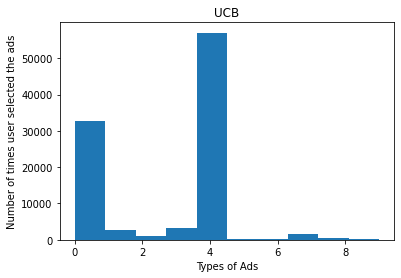

In [6]:
plt.hist(ads_selected)
plt.title('UCB')
plt.xlabel('Types of Ads')
plt.ylabel('Number of times user selected the ads')
plt.show()